# DSCI 503 - Project 02

### Anthony Appiani

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Part A: Stock Simulation Function
In this section, you will create and test a function to generate sequences of simulated daily stock prices, or runs. 

In [2]:
def simulate_stock(start,rate,vol,days):
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5),size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    prices = np.round(daily_multipliers * start,2)
    
    prices = np.concatenate(([start],prices))
    
    return prices

In [3]:
np.random.seed(1)
simulate_stock(500,.08,.3,60)


array([500.  , 515.75, 509.98, 505.08, 495.1 , 503.42, 482.15, 498.47,
       491.51, 494.63, 492.47, 506.42, 487.24, 484.43, 481.08, 491.66,
       481.7 , 480.28, 472.53, 473.06, 478.45, 468.75, 479.15, 487.54,
       492.35, 500.96, 494.69, 493.7 , 485.2 , 482.9 , 487.92, 481.74,
       478.29, 472.27, 464.93, 459.22, 459.25, 449.8 , 451.94, 466.49,
       473.23, 471.66, 463.97, 457.61, 472.63, 473.23, 467.72, 469.56,
       488.73, 489.99, 495.9 , 498.88, 495.73, 485.29, 482.25, 480.5 ,
       486.01, 493.94, 502.87, 505.75, 514.44])

### Testing simulate_stock function

514.44


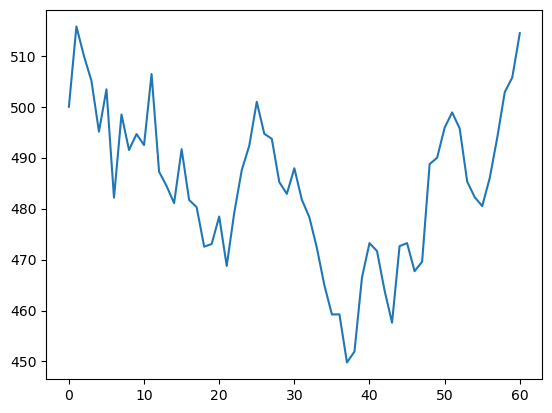

In [4]:
np.random.seed(1)
days = 60
start = 500
vol = 0.3
rate=0.08
simulate = simulate_stock(start,rate,vol,days)
print(simulate[-1])
plt.plot(simulate)



## Part B: Annual Yield Function
In this section, we will create and test a function that takes a simulated run as its input, and calculates the annual yield during for that particular run.

In [5]:
def find_yield(run):
    initial_price = run[0]
    final_price = run[-1]
    days_in_run = len(run) -1 
    annual_yield= math.log(final_price/initial_price)*(252/days_in_run)
    
    return round(annual_yield,4)

## Testing find_yield function

In [6]:
np.random.seed(1)
days = 60
start = 500
vol = 0.3
rate=0.08

find_yield(simulate_stock(start,rate,vol,days))

0.1196

## next cell will explore the potential variability in our simulated runs by creating plotting 25 runs

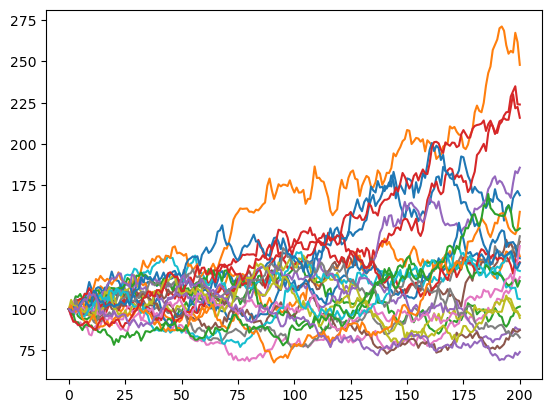

In [7]:
start = 100
rate = .06
vol = .4
days = 200
annual_yields = []

for i in range(25):
    sim_price = simulate_stock(start,rate,vol,days)
    yields = find_yield(simulate_stock(start,rate,vol,days))
    annual_yields.append(yields)
    plt.plot(sim_price)

## Printing list of the annual yields from prev cell

## 

In [8]:
print(annual_yields)
print (len(annual_yields))

[0.2836, 0.1506, 0.3635, -0.5283, -0.6351, -0.1446, -0.4586, 0.4768, -1.2092, 0.7724, -0.0558, 0.6283, -0.1716, -0.385, -0.689, 0.3519, -0.9495, -0.3226, 0.0628, 0.1462, 0.3128, -0.1038, 0.1305, 0.0058, -0.1774]
25


## Part C: Finding Seeds that Generate Specific Outcomes
experience working with seeds. Through trial-and-error, you will try to find
seeds that result in specific outcomes.

### In the cell below, Stock A has the highest simulated final price.

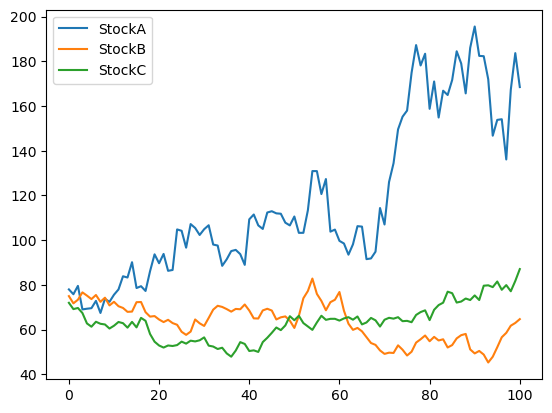

In [9]:
np.random.seed(569)

days = list(range(0,101))
stockA = simulate_stock(78,.04,1.2,100)
stockB = simulate_stock(75,.08,.8,100)
stockC = simulate_stock(72,.16,.6,100)

plt.plot(days,stockA,label = "StockA")
plt.plot(days,stockB,label = "StockB")
plt.plot(days,stockC,label = "StockC")


plt.legend()

### In the cell below, Stock B has the highest simulated final price

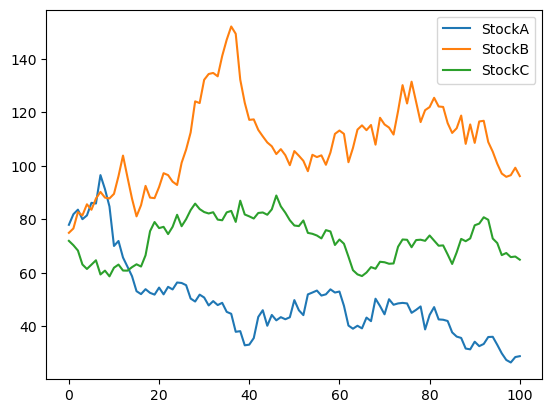

In [10]:
np.random.seed(169)

days = list(range(0,101))
stockA = simulate_stock(78,.04,1.2,100)
stockB = simulate_stock(75,.08,.8,100)
stockC = simulate_stock(72,.16,.6,100)

plt.plot(days,stockA,label = "StockA")
plt.plot(days,stockB,label = "StockB")
plt.plot(days,stockC,label = "StockC")

plt.legend()

### In the cell below, Stock C has the highest simulated final price

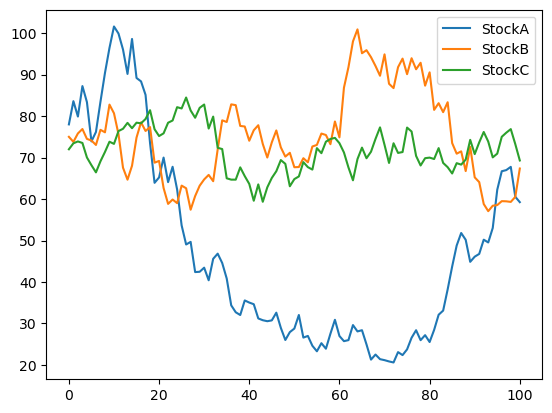

In [11]:
np.random.seed(69)
days = list(range(0,101))
stockA = simulate_stock(78,.04,1.2,100)
stockB = simulate_stock(75,.08,.8,100)
stockC = simulate_stock(72,.16,.6,100)

plt.plot(days,stockA,label = "StockA")
plt.plot(days,stockB,label = "StockB")
plt.plot(days,stockC,label = "StockC")

plt.legend()

## Part D: Monte Carlo Simulation
 perform many simulations, and then look at the range of outcomes occurring in this simulations. The process of performing several simulations to estimate
probabilities relating to the outcome of a certain event is called Monte Carlo Simulation

In [12]:
def monte_carlo(start,rate,vol,days,num_runs):
    final_prices = []
    annual_yields = []
    s = start
    r = rate
    v = vol
    d = days
    num_runs = num_runs
    
    for j in range(num_runs):
        sp = simulate_stock(s,r,v,d)
        final_prices.append(sp[-1])
        annual_yields.append(find_yield(sp))
     
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)                      
                    
    return(final_prices,annual_yields)

### Testing Monte Carlo function 

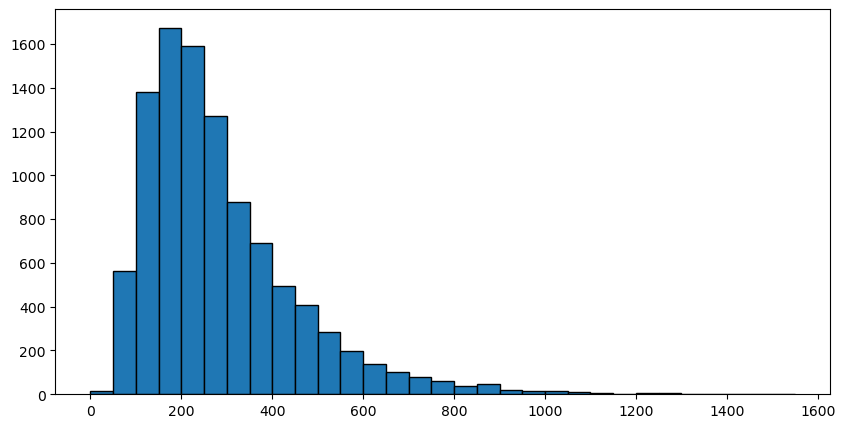

10000


In [13]:
np.random.seed(1)
start = 200
rate = .10
vol = .4
days = 500
num_runs = 10000

plt.figure(figsize=(10, 5))
fp = monte_carlo(start,rate,vol,days,num_runs)[0]
plt.hist(fp, edgecolor='black', bins=np.arange(0, 1600, 50))
plt.show()

print(len(fp))

### Display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [14]:
p = [10,25,50,75,90]
for x in p:
    print(f'{x}th percentile: {round(np.percentile(fp,x),2)}')

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
explore volatility by performing two Monte Carlo Simulations. The two simulations will use different volatilities

In [15]:
np.random.seed(1)
start = 100
rate = .12
vol1 = .3
vol2 = .7
days = 150
num_runs = 10000

results1 = monte_carlo(start,rate,vol1,days,num_runs)
results2 =  monte_carlo(start,rate,vol2,days,num_runs)

print(f'Average Annual Yield for A over 10000 runs: {round(np.mean(results1[1]),4)}')
print(f'Average Annual Yield for A over 10000 runs: {round(np.mean(results2[1]),4)}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for A over 10000 runs: 0.1128


### Creating histogram to visually inspect the Monte Carlo simulations 

In [16]:
stock_A = results1[0]
stock_B = results2[0]

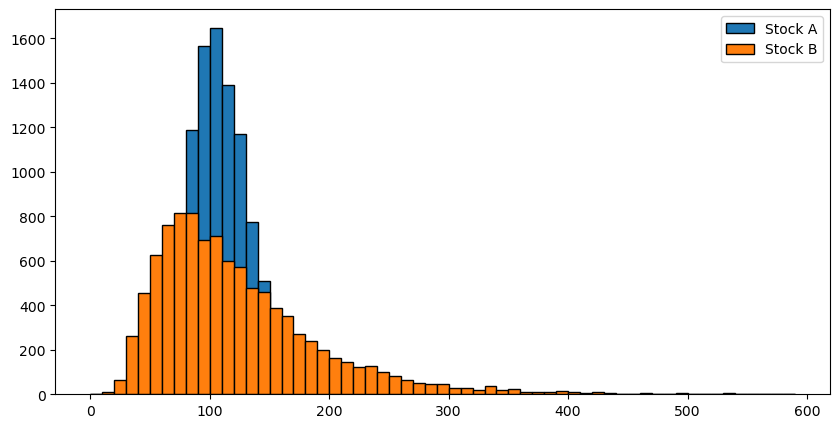

In [17]:
plt.figure(figsize = [10,5])
plt.hist(stock_A, bins= np.arange(0,600, 10), edgecolor = 'black', label = 'Stock A')
plt.hist(stock_B, bins = np.arange(0,600, 10), edgecolor = 'black', label = 'Stock B')

plt.legend()
plt.show()

## Part F: Comparing Two Stocks
Use Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with different parameters. 

In [18]:
np.random.seed(1)
start = 120 
days = 252 
num_runs = 10000

#stock A
rate_A = .08
vol_A = .2

#stock B 
rate_B = .05
vol_B = .05

resultsA = monte_carlo(start,rate_A,vol_A,days,num_runs)[0]
resultsB = monte_carlo(start,rate_B,vol_B,days, num_runs)[0]

print('Proportions of runs in which...')
print('-'*31)
print(f'A ends above B:   {np.sum(resultsA>resultsB)}')
print( )
print(f'A ends above 150: {np.sum(resultsA >150)}')
print(f'B ends above 150: {np.sum(resultsB >150)}')
print( )
print(f'A ends below 100: {np.sum(resultsA <100)}')
print(f'B ends below 100: {np.sum(resultsB <100)}')


Proportions of runs in which...
-------------------------------
A ends above B:   5587

A ends above 150: 2338
B ends above 150: 3

A ends below 100: 950
B ends below 100: 0


## Part G: Expected Call Payoff
run a monte carlo and predict the payoff 

In [19]:
np.random.seed(1)

final_prices = monte_carlo(200,.11,.4,150,10000 )[0]
stock_call= final_prices - 250
d = np.where(stock_call <0)
stock_call[d] = 0
avg_payout = np.mean(stock_call)
print(f'Average call payoff over 1000 runs: {avg_payout}')

Average call payoff over 1000 runs: 17.863867
